# CA05 - KNN based Movie Recommender Engine

## 1. The Application

At Scale, this would look like recommending products on Amazon, articles on Medium, movies on Netflix, or videos on Youtube. <br>
Although, they all use more efficient means of making recommendations due to the enormous volume of data they process. <br>
However, we would replicate one of these recommender systems on a smaller scale using what we have learned. <br>


## 2. Data Source and Contents
Since we are not working at they big companies, we could not grab the data from the data warehouse, we have to get our data through some other means. <br>

We are going to use:<br>

<u>Data File Name: </u> movies_recommendation_data.csv <br>
<u>File Location: </u> https://github.com/ArinB/MSBA-CA-Data/raw/main/CA05/movies_recommendation_data.csv <br>

The data contains thirty movies, including data for each movie across seven genres and their IMDB ratings. <br>
The labels column values are all zeroes because we are not using this data set for classification or regression. <br>
The implementation assumes that all columns contain numerical data. <br>
<br>
Additionally, there are relationships among the movies that will not accounted for (e.g. actors, directors, and themes),
when using the KNN algorithm simply because the data that captures those relationships are missing from the data set.<br>
Consequently, when running the kNN algorithm on the data, similarity will be based solely on the included genres and the IMDB ratings of the movies.


## 3. Building the own Recommender System

The movie recommendation webite will be built by using the Recommendation Engine at the back-end.<br>
Imagine a user is navigating the recommendation website, and this user encounters a movie named "The Post".<br>
The user is not sure if he/she wants to watch it, but its genres intrigue the user;<br>
The user is curious about other similar movies. The user scrolls down to the "More Like This" section to see what recommendations your recommendation website will make, and the back-end algorithmic gears begin to turn.<br><br>

Your website sends a request to its back-end for the 5 movies that are most similar to "The Post".<br>
The back-end has a recommendation data set exactly like ours.<br>
It begins by creating the row representation (better known as a <b>feature vector</b> for <i>The Post</i>,<br>
then it runs a program similar to the one to search for the 5 movies that are most similar the <i>The Post</i>,<br>
and finally sends the results back to the user at the website.


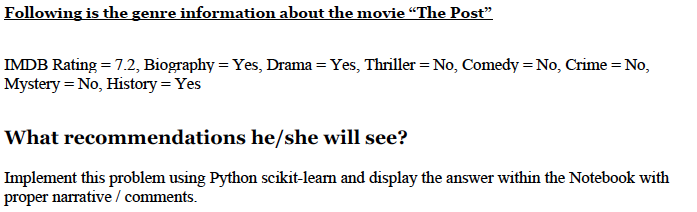


In [1]:
# import necessary packages

import pandas as pd
import numpy as np

In [2]:
# read the movie csv 
df =pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA05/movies_recommendation_data.csv")

# Look into the columns of the movie dataset 
df.columns = ["Movie ID","Movie Name", "IMDB Rating", "Biography", "Drama", "Thriller", "Comedy","Crime","Mystery","History","Label"]

In [3]:
df.head()

,Movie ID,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
0,58,The Imitation Game,8.0,1,1,1,0,0,0,0,0
1,8,Ex Machina,7.7,0,1,0,0,0,1,0,0
2,46,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
3,62,Good Will Hunting,8.3,0,1,0,0,0,0,0,0
4,97,Forrest Gump,8.8,0,1,0,0,0,0,0,0


In [4]:
user_data = {"Movie Name" : "The Post", "IMDB Rating" : 7.2, "Biography" : 1, "Drama" : 1, "Thriller": 0,
             "Comedy": 0, "Crime":0, "Mystery": 0, "History": 1}

In [5]:
# create a dataframe with only required categories from user input:

users_columns = ["IMDB Rating", "Biography", "Drama", "Thriller", "Comedy",
                 "Crime","Mystery","History"]

# make the user data into a list in order to create a dataframe
user_data = [user_data]


# Make the users information into a dataframe
users_df = pd.DataFrame(user_data, columns = users_columns)

In [6]:
print(users_df)

   IMDB Rating  Biography  Drama  Thriller  Comedy  Crime  Mystery  History
0          7.2          1      1         0       0      0        0        1


Collaborative Filtering Using k-Nearest Neighbors (kNN)

In [7]:
# import the neighbors package from sklearn

from sklearn.neighbors import NearestNeighbors

In [8]:
# Set we only want 5 neighbors
k = 5

In [9]:
# Extract the user features for training 
X = df[users_df.columns].values

In [10]:
# Generate and train the kNN model
# use the metric of euclidean: 
# euclidean is the same as "distance = sqrt((x2 - x1)^2 + (y2 - y1)^2)"

knn_model = NearestNeighbors(n_neighbors = k, algorithm = "auto",
                             metric = "euclidean") 

knn_model.fit(X)

NearestNeighbors(metric='euclidean')

In [11]:
# Look for the similar movies by creating a function:

def find_similar_movies(user_data, k):
    distances, indices = knn_model.kneighbors([user_data], n_neighbors = k)
    return df.iloc[indices[0]]

In [12]:
# Use the function to find similar movies for a specific user

similar_movies = find_similar_movies(users_df.iloc[0].values, k)

In [13]:
# Print out the top 5 movies that have the similar perferences
movie_name = user_data[0]["Movie Name"]

print(f"Similar movies for: {movie_name}")
print("-" * 50)
print(similar_movies["Movie Name"].to_string(index = False))
print("-" * 50)


Similar movies for: The Post
--------------------------------------------------
12 Years a Slave
   Hacksaw Ridge
  Queen of Katwe
  The Wind Rises
A Beautiful Mind
--------------------------------------------------
